## The task assigned is to extract/ scrape data from a Restraunt from Zomato and perform exploratory data analysis through visualizations using Python/ Tableau.
## I have done web scraping using BeautifulSoup and visualizations have been made using Python.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
# importing web scraping libraries

In [2]:
#Used headers/agent because the request was timed out and asking for an agent. 
#Using following code we can fake the agent.
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get("https://www.zomato.com/bangalore/voosh-thalis-bowls-1-bellandur-bangalore/order",headers=headers)

In [3]:
content = response.content
soup = BeautifulSoup(content,"html.parser")

In [4]:
soup


<!DOCTYPE html>

<html>
<head>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://googleads.g.doubleclick.net" rel="preconnect"/>
<link href="https://jumbo.zomato.com" rel="preconnect"/>
<link href="https://accounts.google.com" rel="preconnect"/>
<link href="https://securepubads.g.doubleclick.net" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://www.googleadservices.com" rel="preconnect"/>
<link href="https://bat.bing.com" rel="preconnect"/>
<link href="https://8391443.fls.doubleclick.net" rel="preconnect"/>
<title data-rh="true">Voosh Thalis &amp; Bowls, Bellandur order online - Zomato</title>
<meta charset="utf-8" data-rh="true"><meta content="NOODP,NOYDIR" data-rh="true" name="robots"/><meta content="Order food online from Voosh Thalis &amp; Bowls, Bellandur, Bangalore and get great offers and super-fast delivery on Zomato." data-rh="true" name="description"/><meta content="summary" data-r

In [5]:
item_name = soup.find_all('h4',class_='sc-1s0saks-15 iSmBPS')
item_name = item_name[0].text
print(item_name)
item_description = soup.find_all('p',class_='sc-1s0saks-12 hcROsL')
item_description =item_description[0].text
print(item_description)
item_price = soup.find_all('span',class_='sc-17hyc2s-1 cCiQWA')
item_price =item_price[0].text
print(item_price)
tag = soup.find_all('div',class_='sc-2gamf4-0 cRxPpO')
tag =tag[0].text
print(tag)
# Printing one item along with their price and description for testing.

2 Gobhi Paratha, Curd & Pickle Meal
2 gobhi parathas, curd, sweet, salad and pickle. Amazing for one.
₹134
MUST TRY


In [6]:
item_name = soup.find_all('h4',class_='sc-1s0saks-15 iSmBPS')
item_description = soup.find_all('p',class_='sc-1s0saks-12 hcROsL')
item_price = soup.find_all('span',class_='sc-17hyc2s-1 cCiQWA')
tag = soup.find_all('div',class_='sc-2gamf4-0 cRxPpO')

In [7]:
print(len(item_name))
print(len(item_description))
print(len(item_price))
print(len(tag))
# printing length of items

11
11
11
4


In [8]:
for i in range(len(item_name)):
    print(item_name[i].text)
    print(item_description[i].text)
    print(item_price[i].text)
    print("\n")
# writing for loop to loop through all items in the web page.    

2 Gobhi Paratha, Curd & Pickle Meal
2 gobhi parathas, curd, sweet, salad and pickle. Amazing for one.
₹134


2 Paneer Paratha, Curd & Pickle Meal
2 paneer parathas, curd, sweet, salad and pickle. Amazing for one.
₹144


Voosh Paratha Platter with Butter Milk
Enjoy a delicious meal of paneer paratha(1 piece), aloo paratha(1 piece), paneer masala, ... read more
₹219


Set of Chapatis (4 - Chapatis)
Wheat chapattis - soft, fluffy and cooked to perfection.
₹79


2 Gobhi Paratha, Curd & Pickle Meal
2 gobhi parathas, curd, sweet, salad and pickle. Amazing for one.
₹134


2 Paneer Paratha, Curd & Pickle Meal
2 paneer parathas, curd, sweet, salad and pickle. Amazing for one.
₹144


Voosh Paratha Platter with Butter Milk
Enjoy a delicious meal of paneer paratha(1 piece), aloo paratha(1 piece), paneer masala, ... read more
₹219


Set of Chapatis (4 - Chapatis)
Wheat chapattis - soft, fluffy and cooked to perfection.
₹79


Raita
Freshly made with crispy cucumber garnishing.
₹59


Salad
Fresh carr

In [9]:
df = pd.DataFrame({'Item Name':item_name,'Item Description':item_description,'Price':item_price})
df.head()
# Converting scraped data to data frame

,Item Name,Item Description,Price
0,"[2 Gobhi Paratha, Curd & Pickle Meal]","[2 gobhi parathas, curd, sweet, salad and pick...",[₹134]
1,"[2 Paneer Paratha, Curd & Pickle Meal]","[2 paneer parathas, curd, sweet, salad and pic...",[₹144]
2,[Voosh Paratha Platter with Butter Milk],[Enjoy a delicious meal of paneer paratha(1 pi...,[₹219]
3,[Set of Chapatis (4 - Chapatis)],"[Wheat chapattis - soft, fluffy and cooked to ...",[₹79]
4,"[2 Gobhi Paratha, Curd & Pickle Meal]","[2 gobhi parathas, curd, sweet, salad and pick...",[₹134]


In [10]:
df2 = pd.DataFrame({'Item Tag':tag})
df2
# creating new data frame for Item Tag

,Item Tag
0,[MUST TRY]
1,[MUST TRY]
2,[MUST TRY]
3,[MUST TRY]


In [11]:
dataframe = pd.concat([df, df2], join = 'outer', axis = 1)
# Concatenating both data frames

In [12]:
dataframe

,Item Name,Item Description,Price,Item Tag
0,"[2 Gobhi Paratha, Curd & Pickle Meal]","[2 gobhi parathas, curd, sweet, salad and pick...",[₹134],[MUST TRY]
1,"[2 Paneer Paratha, Curd & Pickle Meal]","[2 paneer parathas, curd, sweet, salad and pic...",[₹144],[MUST TRY]
2,[Voosh Paratha Platter with Butter Milk],[Enjoy a delicious meal of paneer paratha(1 pi...,[₹219],[MUST TRY]
3,[Set of Chapatis (4 - Chapatis)],"[Wheat chapattis - soft, fluffy and cooked to ...",[₹79],[MUST TRY]
4,"[2 Gobhi Paratha, Curd & Pickle Meal]","[2 gobhi parathas, curd, sweet, salad and pick...",[₹134],NaN
5,"[2 Paneer Paratha, Curd & Pickle Meal]","[2 paneer parathas, curd, sweet, salad and pic...",[₹144],NaN
6,[Voosh Paratha Platter with Butter Milk],[Enjoy a delicious meal of paneer paratha(1 pi...,[₹219],NaN
7,[Set of Chapatis (4 - Chapatis)],"[Wheat chapattis - soft, fluffy and cooked to ...",[₹79],NaN
8,[Raita],[Freshly made with crispy cucumber garnishing.],[₹59],NaN
9,[Salad],"[Fresh carrot, cucumber, tomato and aromatic c...",[₹59],NaN


In [13]:
rat = []
for i in range(len(dataframe['Item Name'])):
    if type(dataframe['Item Name'][i]) == float:
        rat.append(dataframe['Item Name'][i])
    else:
        rat.append(dataframe['Item Name'][i].text)
len(rat)

desc = []
for i in range(len(dataframe['Item Description'])):
    if type(dataframe['Item Description'][i]) == float:
        desc.append(dataframe['Item Description'][i])
    else:
        desc.append(dataframe['Item Description'][i].text)
len(desc)

price = []
for i in range(len(dataframe['Price'])):
    if type(dataframe['Price'][i]) == float:
        price.append(dataframe['Price'][i])
    else:
        price.append(dataframe['Price'][i].text)
len(price)

tag = []
for i in range(len(dataframe['Item Tag'])):
    if type(dataframe['Item Tag'][i]) == float:
        tag.append(dataframe['Item Tag'][i])
    else:
        tag.append(dataframe['Item Tag'][i].text)
len(tag)
# removing brackets from data frame

11

In [14]:
dataframe['Item Name'] = rat
dataframe.head()
dataframe['Item Description'] = desc
dataframe.head()
dataframe['Price'] = price
dataframe.head()
dataframe['Item Tag'] = tag
dataframe.head()
# Final data frame

,Item Name,Item Description,Price,Item Tag
0,"2 Gobhi Paratha, Curd & Pickle Meal","2 gobhi parathas, curd, sweet, salad and pickl...",₹134,MUST TRY
1,"2 Paneer Paratha, Curd & Pickle Meal","2 paneer parathas, curd, sweet, salad and pick...",₹144,MUST TRY
2,Voosh Paratha Platter with Butter Milk,Enjoy a delicious meal of paneer paratha(1 pie...,₹219,MUST TRY
3,Set of Chapatis (4 - Chapatis),"Wheat chapattis - soft, fluffy and cooked to p...",₹79,MUST TRY
4,"2 Gobhi Paratha, Curd & Pickle Meal","2 gobhi parathas, curd, sweet, salad and pickl...",₹134,NaN


In [15]:
dataframe.dtypes
# Type of data present in our dataframe

Item Name           object
Item Description    object
Price               object
Item Tag            object
dtype: object

In [16]:
pd.set_option("display.max_colwidth", -1)

<ipython-input-16-a09e5efec013>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [17]:
df = dataframe

In [18]:
df

,Item Name,Item Description,Price,Item Tag
0,"2 Gobhi Paratha, Curd & Pickle Meal","2 gobhi parathas, curd, sweet, salad and pickle. Amazing for one.",₹134,MUST TRY
1,"2 Paneer Paratha, Curd & Pickle Meal","2 paneer parathas, curd, sweet, salad and pickle. Amazing for one.",₹144,MUST TRY
2,Voosh Paratha Platter with Butter Milk,"Enjoy a delicious meal of paneer paratha(1 piece), aloo paratha(1 piece), paneer masala, ... read more",₹219,MUST TRY
3,Set of Chapatis (4 - Chapatis),"Wheat chapattis - soft, fluffy and cooked to perfection.",₹79,MUST TRY
4,"2 Gobhi Paratha, Curd & Pickle Meal","2 gobhi parathas, curd, sweet, salad and pickle. Amazing for one.",₹134,NaN
5,"2 Paneer Paratha, Curd & Pickle Meal","2 paneer parathas, curd, sweet, salad and pickle. Amazing for one.",₹144,NaN
6,Voosh Paratha Platter with Butter Milk,"Enjoy a delicious meal of paneer paratha(1 piece), aloo paratha(1 piece), paneer masala, ... read more",₹219,NaN
7,Set of Chapatis (4 - Chapatis),"Wheat chapattis - soft, fluffy and cooked to perfection.",₹79,NaN
8,Raita,Freshly made with crispy cucumber garnishing.,₹59,NaN
9,Salad,"Fresh carrot, cucumber, tomato and aromatic coriander garnishing.",₹59,NaN


In [19]:
df.to_csv('ScrapedData.csv', header=False, index=False) 
# Saving dataframe in csv format

# Text Analysis.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [21]:
# load saved data frame
df=pd.read_csv("ScrapedData.csv",names=('Item_Name,Item_Description,Price,Item_Tag').split(','))

In [22]:
df['Item_Description']=df['Item_Description'].str.replace("read more","")

In [23]:
df

,Item_Name,Item_Description,Price,Item_Tag
0,"2 Gobhi Paratha, Curd & Pickle Meal","2 gobhi parathas, curd, sweet, salad and pickle. Amazing for one.",₹134,MUST TRY
1,"2 Paneer Paratha, Curd & Pickle Meal","2 paneer parathas, curd, sweet, salad and pickle. Amazing for one.",₹144,MUST TRY
2,Voosh Paratha Platter with Butter Milk,"Enjoy a delicious meal of paneer paratha(1 piece), aloo paratha(1 piece), paneer masala, ...",₹219,MUST TRY
3,Set of Chapatis (4 - Chapatis),"Wheat chapattis - soft, fluffy and cooked to perfection.",₹79,MUST TRY
4,"2 Gobhi Paratha, Curd & Pickle Meal","2 gobhi parathas, curd, sweet, salad and pickle. Amazing for one.",₹134,NaN
5,"2 Paneer Paratha, Curd & Pickle Meal","2 paneer parathas, curd, sweet, salad and pickle. Amazing for one.",₹144,NaN
6,Voosh Paratha Platter with Butter Milk,"Enjoy a delicious meal of paneer paratha(1 piece), aloo paratha(1 piece), paneer masala, ...",₹219,NaN
7,Set of Chapatis (4 - Chapatis),"Wheat chapattis - soft, fluffy and cooked to perfection.",₹79,NaN
8,Raita,Freshly made with crispy cucumber garnishing.,₹59,NaN
9,Salad,"Fresh carrot, cucumber, tomato and aromatic coriander garnishing.",₹59,NaN


# Word Counts

In [24]:
import nlp_utils as nu
import nltk
import numpy as np
import collections
import nlp_utils as nu
from matplotlib import rcParams
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.cm as cm

### Text Normalisation

In [25]:
df['Item_Description'] = df['Item_Description'].apply(nu.lemmatization_sentence)

In [26]:
df['Item_Description']

0     2 gobhi parathas curd sweet salad and pickle amazing for one                           
1     2 paneer parathas curd sweet salad and pickle amazing for one                          
2     enjoy a delicious meal of paneer paratha 1 piece aloo paratha 1 piece paneer masala ...
3     wheat chapatti soft fluffy and cook to perfection                                      
4     2 gobhi parathas curd sweet salad and pickle amazing for one                           
5     2 paneer parathas curd sweet salad and pickle amazing for one                          
6     enjoy a delicious meal of paneer paratha 1 piece aloo paratha 1 piece paneer masala ...
7     wheat chapatti soft fluffy and cook to perfection                                      
8     freshly make with crispy cucumber garnishing                                           
9     fresh carrot cucumber tomato and aromatic coriander garnishing                         
10    refresh butter milk prepare out of quality curd and in

In [27]:
Text=df['Item_Description']

In [28]:
Text

0     2 gobhi parathas curd sweet salad and pickle amazing for one                           
1     2 paneer parathas curd sweet salad and pickle amazing for one                          
2     enjoy a delicious meal of paneer paratha 1 piece aloo paratha 1 piece paneer masala ...
3     wheat chapatti soft fluffy and cook to perfection                                      
4     2 gobhi parathas curd sweet salad and pickle amazing for one                           
5     2 paneer parathas curd sweet salad and pickle amazing for one                          
6     enjoy a delicious meal of paneer paratha 1 piece aloo paratha 1 piece paneer masala ...
7     wheat chapatti soft fluffy and cook to perfection                                      
8     freshly make with crispy cucumber garnishing                                           
9     fresh carrot cucumber tomato and aromatic coriander garnishing                         
10    refresh butter milk prepare out of quality curd and in

In [29]:
token=nltk.sent_tokenize(str(Text))
## Sentence tokenization

In [30]:
data = np.array(token)
## Saving token in form of array

In [31]:
nltk.download('stopwords')
stop = stopwords.words('english')
## Saving stopwords in stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Removing StopWords.

In [32]:
text = data
text_tokens = word_tokenize(str(text))

tokens_without_sw = [word for word in text_tokens if not word in stop]

print(tokens_without_sw)   
## Removing stopwords from the text and printing the words without stopwords

['[', "'", '0', '2', 'gobhi', 'parathas', 'curd', 'sweet', 'salad', 'pickle', 'amazing', 'one', '\\n1', '2', 'paneer', 'parathas', 'curd', 'sweet', 'salad', 'pickle', 'amazing', 'one', '\\n2', 'enjoy', 'delicious', 'meal', 'paneer', 'paratha', '1', 'piece', 'aloo', 'paratha', '1', 'piece', 'paneer', 'masala', '...', '\\n3', 'wheat', 'chapatti', 'soft', 'fluffy', 'cook', 'perfection', '\\n4', '2', 'gobhi', 'parathas', 'curd', 'sweet', 'salad', 'pickle', 'amazing', 'one', '\\n5', '2', 'paneer', 'parathas', 'curd', 'sweet', 'salad', 'pickle', 'amazing', 'one', '\\n6', 'enjoy', 'delicious', 'meal', 'paneer', 'paratha', '1', 'piece', 'aloo', 'paratha', '1', 'piece', 'paneer', 'masala', '...', '\\n7', 'wheat', 'chapatti', 'soft', 'fluffy', 'cook', 'perfection', '\\n8', 'freshly', 'make', 'crispy', 'cucumber', 'garnishing', '\\n9', 'fresh', 'carrot', 'cucumber', 'tomato', 'aromatic', 'coriander', 'garnishing', '\\n10', 'refresh', 'butter', 'milk', 'prepare', 'quality', 'curd', 'indian', 'spic

In [33]:
stopwords = set(stopwords.words("english"))

In [34]:
wordcloud = WordCloud(stopwords=stop, background_color="black", max_words=300).generate(str(tokens_without_sw))

# These are the most common words repeating in the Item_Description column and they are visualised here in word cloud

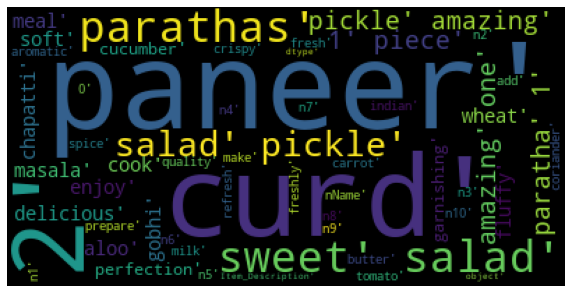

In [35]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [36]:
tokens_without_sw=(str(tokens_without_sw))

In [37]:
filtered_words = [word for word in tokens_without_sw.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

In [38]:
counted_words.most_common(25) # the word 'paneer' has repeated for 6 times.

[("'paneer',", 6),
 ("'curd',", 5),
 ("'2',", 4),
 ("'parathas',", 4),
 ("'sweet',", 4),
 ("'salad',", 4),
 ("'pickle',", 4),
 ("'amazing',", 4),
 ("'one',", 4),
 ("'paratha',", 4),
 ("'1',", 4),
 ("'piece',", 4),
 ("'...',", 3),
 ('"\'",', 2),
 ("'gobhi',", 2),
 ("'enjoy',", 2),
 ("'delicious',", 2),
 ("'meal',", 2),
 ("'aloo',", 2),
 ("'masala',", 2),
 ("'wheat',", 2),
 ("'chapatti',", 2),
 ("'soft',", 2),
 ("'fluffy',", 2),
 ("'cook',", 2)]

<BarContainer object of 10 artists>

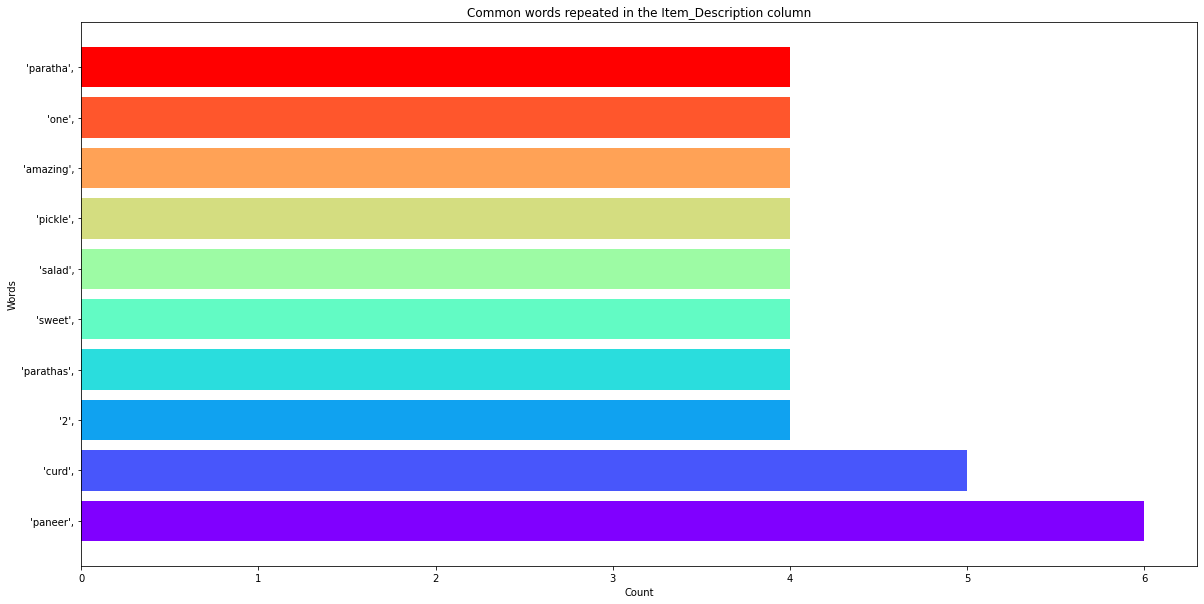

In [39]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Common words repeated in the Item_Description column')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

# These are the top 10 Most Repeating words in Item_Description